In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = '/content/'

store_filename = 'store.csv'
df_stores = pd.read_csv(path + store_filename)
#cat_columns = ["StateHoliday", "StoreType", "Assortment", "PromoInterval", "Month", "DayOfWeek"]

train_filename = 'train.csv'
df = pd.read_csv(path + train_filename)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
df = pd.merge(df, df_stores, on="Store")

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612.0,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
df.shape

(55813, 18)

In [ ]:
#######################################################
# Extracting relevant time features
#######################################################

# day of the week is already processed
df["Year"] = pd.to_datetime(df.Date).dt.year
df["Month"] = pd.to_datetime(df.Date).dt.month

In [ ]:
#######################################################
# Computing statistics on several time scales
#######################################################

In [ ]:
# average sales per year per store


In [ ]:
dico_years = {}
for year in range(2013, 2016):
    dico_years[year] = df[df.Year == year].groupby("Store").Sales.mean().to_dict()


In [ ]:
# average sales per month per store
dico_months = {}
for month in range(1, 13):
   dico_months[month] = df[df.Month == month].groupby("Store").Sales.mean().to_dict()

In [ ]:
# average sales per weekday per store 
dico_weekdays = {}
for weekday in range(1, 7):
    dico_weekdays[weekday] = df[df.DayOfWeek == weekday].groupby("Store").Sales.mean().to_dict()
        

In [ ]:
 # average sales per year per store   
for year in dico_years:
    df["Sales_in_Year_"+str(year)] = df.Store.apply(lambda t: dico_years[year].get(t, 0)) 

In [ ]:
# sales per store on the previous and next month

In [ ]:
last_month = (lambda x: (x - 2) % 12 + 1) # returns the previous month value
next_month = (lambda x: x % 12 + 1) # returns the next month value

In [ ]:
df["Store_Month"] = df.Store.astype(str) + "_" + df.Month.astype(str)
df["Mean_Sales_in_Last_Month"] = df["Store_Month"].apply(lambda t: dico_months[last_month(int(t.split("_")[1]))].get(int(t.split("_")[0]), 0.))
df["Mean_Sales_in_Next_Month"] = df["Store_Month"].apply(lambda t: dico_months[next_month(int(t.split("_")[1]))].get(int(t.split("_")[0]), 0.)) 
df.drop("Store_Month", axis=1, inplace=True)

In [ ]:
yesterday = (lambda x: (x - 2) % 6 + 1) # returns the last day value
tomorrow = (lambda x: x % 6 + 1) # returns the next day value
df["Store_DayOfWeek"] = df.Store.astype(str) + "_" + df.DayOfWeek.astype(str)
df["Mean_Sales_in_Yesterday"] = df["Store_DayOfWeek"].apply(lambda t: dico_weekdays[yesterday(int(t.split("_")[1]))].get(int(t.split("_")[0]), 0.))
df["Mean_Sales_in_Tomorrow"] = df["Store_DayOfWeek"].apply(lambda t: dico_weekdays[tomorrow(int(t.split("_")[1]))].get(int(t.split("_")[0]), 0.)) 
df.drop("Store_DayOfWeek", axis=1, inplace=True)

In [ ]:
under_yesterday = df[df['Sales'] < df['Mean_Sales_in_Yesterday']]
bellow_yesterday = df[df['Sales'] > df['Mean_Sales_in_Yesterday']]

In [ ]:
df['percentage_sales']= df['Sales']/df['Customers']

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Sales_in_Year_2013', 'Sales_in_Year_2014', 'Sales_in_Year_2015',
       'Mean_Sales_in_Last_Month', 'Mean_Sales_in_Next_Month',
       'Mean_Sales_in_Yesterday', 'Mean_Sales_in_Tomorrow', 'percentage_sales',
       'hol_effect', 'chrismas'],
      dtype='object')

In [ ]:
under_tomorrow = df[df['Sales'] < df['Mean_Sales_in_Tomorrow']]
bellow_tomorrow = df[df['Sales'] > df['Mean_Sales_in_Tomorrow']]

In [ ]:
sns.distplot(under_tomorrow['Sales'], color = 'red')
sns.distplot(bellow_tomorrow['Sales'],  color = 'green')

In [ ]:
under_last_month = df[df['Sales'] < df['Mean_Sales_in_Last_Month']]
bellow_last_month = df[df['Sales'] > df['Mean_Sales_in_Last_Month']]

In [ ]:
sns.distplot(under_last_month['Sales'], color = 'red')
sns.distplot(bellow_last_month['Sales'],  color = 'green')

In [ ]:
under_next_month = df[df['Sales'] < df['Mean_Sales_in_Next_Month']]
bellow_next_month = df[df['Sales'] > df['Mean_Sales_in_Next_Month']]

In [ ]:
sns.distplot(under_next_month['Sales'], color = 'red')
sns.distplot(bellow_next_month['Sales'],  color = 'green')

In [ ]:
df.columns

In [ ]:
sns.distplot(df['Sales_in_Year_2013'], color = 'red')
sns.distplot(df['Sales_in_Year_2014'],  color = 'green')
sns.distplot(df['Sales_in_Year_2015'],  color = 'blue')


In [ ]:
# holyday impact
hol = df[df['SchoolHoliday']==1]
nonHol = df[df['SchoolHoliday']==0]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


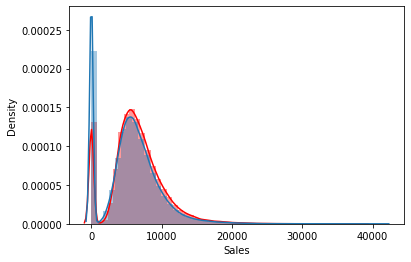

In [ ]:
sns.distplot(hol['Sales'], label='hol', color = 'red')
sns.distplot(nonHol['Sales'], label='nonhol')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df_grouped = df.groupby(['Store', 'SchoolHoliday']).mean()
df_grouped.head()
df_grouped = df_grouped.unstack()
df_grouped['Sales']

SchoolHoliday,0.0,1.0
Store,,
1,3824.799539,3997.353535
2,3971.192661,5021.082474
3,5405.766204,6881.920792
4,7874.651481,9616.872340
5,3734.621247,4401.380000
...,...,...
1111,4048.436195,4839.871287
1112,7600.647332,8740.207921
1113,5441.873303,6286.888889


Text(0, 0.5, 'Mean of sales')

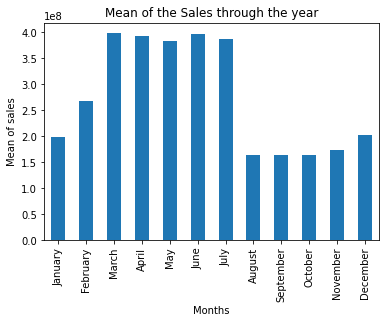

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_sales = df.groupby(df['Date'].dt.strftime('%B'))['Sales'].sum().reindex(new_order, axis=0)
df_sales.plot.bar(title='Mean of the Sales through the year')
plt.xlabel('Months')
plt.ylabel('Mean of sales')

Text(0, 0.5, 'Sales per Customer ratio')

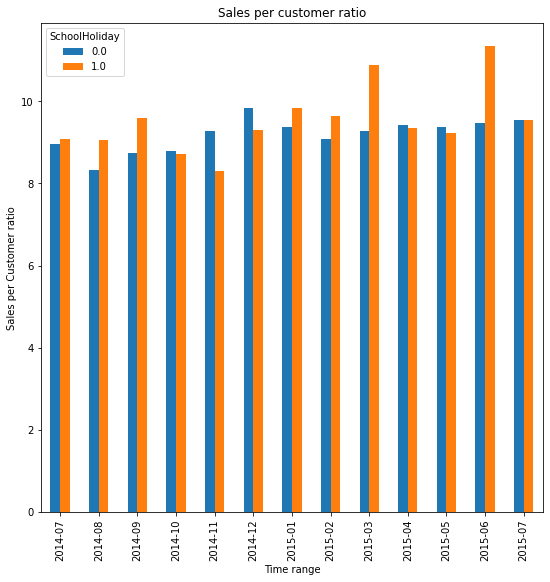

In [ ]:
df_grouped_sum = df.groupby([df.Date.dt.to_period("M"), 'SchoolHoliday']).sum()
df_grouped_sum['Sales per Customer ratio'] = df_grouped_sum['Sales'] / df_grouped_sum['Customers']
df_grouped_sum.loc['2014-07':'2015-07']['Sales per Customer ratio'].unstack().plot.bar(figsize=(9,9), title='Sales per customer ratio')
plt.xlabel('Time range')
plt.ylabel('Sales per Customer ratio')

In [ ]:
df['hol_effect'] = 100*(df_grouped['Sales'][1]-df_grouped['Sales'][0])/df_grouped['Sales'][0]

Text(0.5, 0, '% school holidays effect')

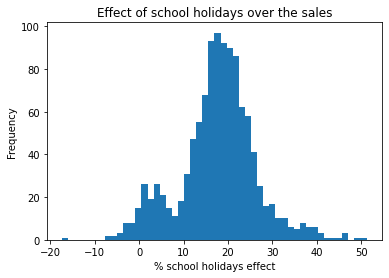

In [ ]:
df['hol_effect'].plot.hist(bins=50, title='Effect of school holidays over the sales')
plt.xlabel('% school holidays effect')

In [ ]:
comp.groupby(['StoreType', 'before']).mean()['Sales'].unstack().plot.bar()

In [ ]:
df['Da'] = df['Date'].dt.strftime('%B')

In [ ]:
# chrismas impact
chrismas = df[df['Date'].dt.strftime('%B')=='December']
nonchrismas = df[df['Date'].dt.strftime('%B')!=12]
ch = []
for i in range (len(df['Da'])):
  if df['Da'][i]=='December':
    ch.append(1)
  else: 
    ch.append(0)

In [ ]:
df['chritsmas'] = ch

In [ ]:
df_grouped = df.groupby(['Store', 'chrismas']).mean()
df_grouped.head()
df_grouped = df_grouped.unstack()
df_grouped['Sales']

chrismas,0,1
Store,,
1,3774.252988,5194.387097
2,4111.683267,4981.290323
3,5615.149402,6824.516129
4,8097.376494,9550.806452
5,3801.541833,4801.774194
...,...,...
1111,4172.259481,4625.838710
1112,7782.263473,8378.258065
1113,5479.538922,7286.419355


In [ ]:
df['chrismas'] = 100*(df_grouped['Sales'][1]-df_grouped['Sales'][0])/df_grouped['Sales'][0]

Text(0.5, 0, '% chritsmas season effect')

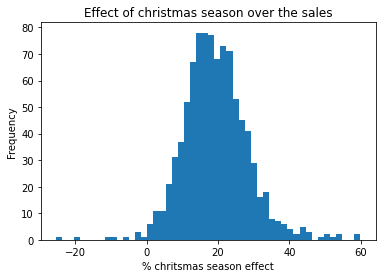

In [ ]:
df['chrismas'].plot.hist(bins=50, title='Effect of christmas season over the sales')
plt.xlabel('% chritsmas season effect')